# NBA Data Project

Max Contreras

## Preliminaries

The dataset and its description are both in the `data` folder. For this project you'll need `numpy`, `pandas`, and either `matplotlib` or `seaborn` for visualization. 

In the next cell, make your imports and load the dataset:

In [97]:
# Imports and loading the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp

nba = pd.read_csv('data/nba_data.csv', encoding = 'latin')

## Exploration

Use `.head()` and `.info()` to ensure that the data was loaded correctly and to get a feel for the data types in each column. Use `.describe()` to check whether or not there are any extreme values that don't make sense (*e.g. Can someone play negative minutes or score negative points? Can someone play a million minutes when there are only 48 minutes per game and 82 games in a season?*)

In [98]:
# Exploring the dataset
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,100,228,328,50,31,30,59,102,508,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,214,271,485,97,36,46,79,98,361,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,184,504,688,240,88,61,187,208,1529,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,43,78,121,67,16,15,41,99,467,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,85,286,371,97,45,48,60,143,696,aldamsa01


In [99]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 679 non-null    int64  
 1   Player             679 non-null    object 
 2   Pos                679 non-null    object 
 3   Age                679 non-null    int64  
 4   Tm                 679 non-null    object 
 5   G                  679 non-null    int64  
 6   GS                 679 non-null    int64  
 7   MP                 679 non-null    int64  
 8   FG                 679 non-null    int64  
 9   FGA                679 non-null    int64  
 10  FG%                676 non-null    float64
 11  3P                 679 non-null    int64  
 12  3PA                679 non-null    int64  
 13  3P%                655 non-null    float64
 14  2P                 679 non-null    int64  
 15  2PA                679 non-null    int64  
 16  2P%                672 non

## Data Cleaning

- The `Rk` and `Player-additional` columns won't be useful to us. Delete them.
- There are several columns with null entries; deal with them appropriately:
    - Is it reasonable for null entries to exist in these columns?
    - Do we need to replace the null values with some other value?

In [100]:
# Cleaning the dataset
nba = nba.drop(['Rk', 'Player-additional'], axis = 1)

Yes there are reasons for keeping null entries to exist in these columns. If there is null, that means that there was no value given, and for example, a player may not have participated in a certain category. Meanwhile, if we replace the null values with zero, that would represent a player having a 0 in a certain category.There is a difference between not doing it, and failing at it. 

## Data Augmentation

While the stats included in the dataset are useful for giving us a wide view of a player's contributions throughout the season, basketball fans and analysts have devised more advanced tools to more accurately quantify these contributions. You can look up any of these statistics to see how they're calculated

Add the following statistics as new columns to the dataframe (suggested column name in parentheses):
- Points per shot (PPS)
- Points per possession (PPP)
- True Shooting Percentage (TS%)
- Free Throw Rate (FTR)
- Assist-to-Turnover Ratio (ATO)
- Hollinger Assist Ratio (hAST%)

In [101]:
# Adding Additional Analytics
nba['PPS'] = ((nba['3P']*3 + nba['2P']*2)/nba['FGA'])
pos = (nba['FGA'] + 0.44*nba['FTA']+nba['TOV'])
nba['PPP'] =  (nba['PTS'] + pos)
nba['TS%'] = (0.5*nba['PTS']/(nba['FGA']+0.475*nba['FTA']))
nba['FTR'] = nba['FTA']/nba['FGA']
nba['ATO'] = nba['AST']/nba['TOV']
nba['hAST%'] = nba['AST']/(nba['FGA'] + 0.475*nba['FTA']+nba['AST']+nba['TOV'])
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,30,59,102,508,1.042079,1025.56,0.548715,0.306931,0.847458,0.087428
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,46,79,98,361,1.193916,759.76,0.556626,0.490494,1.227848,0.193893
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,61,187,208,1529,1.081688,3006.88,0.585846,0.360862,1.283422,0.138572
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,15,41,99,467,1.064767,924.36,0.557579,0.178756,1.634146,0.127189
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,48,60,143,696,1.120000,1344.36,0.586451,0.274286,1.616667,0.129264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Thaddeus Young,PF,34,TOR,54,9,795,108,198,0.545,...,5,42,88,240,1.121212,491.44,0.570478,0.131313,1.785714,0.229113
675,Trae Young,PG,24,ATL,73,73,2541,597,1390,0.429,...,9,300,104,1914,0.969784,3885.16,0.565094,0.459712,2.470000,0.270979
676,Omer Yurtseven,C,24,MIA,9,0,83,16,27,0.593,...,2,4,16,40,1.296296,73.64,0.670017,0.222222,0.500000,0.055788
677,Cody Zeller,C,30,MIA,15,2,217,37,59,0.627,...,4,14,33,98,1.254237,186.40,0.647934,0.593220,0.714286,0.100376


### Team-Contextual Analytics
Understanding a player's value in the context of their *team* is also an important consideration. For example, could a given player be scoring more points simply because they're playing next to a superstar who commands more defensive attention? Is a given center grabbing lots of defensive rebounds because they're skilled, or because their teammates are forcing more bad shots? The following statistics are a bit more difficult to calculate, but may yield better insight about a player's *context* within his team:

- Rebound Rate (TRB%)
- Usage Percentage (USG%)

For these stats you'll need to calculate *team* totals. I recommend creating a pivot table called `team_totals` that aggregates the sum of each column in your original dataset on a per team basis. Then when you need to use a player's team totals, you can look at the appropriate row/column of the `team_totals` dataframe. 

In [119]:
# Team-Contextual Analytics
team_totals = pd.pivot_table(nba, index = 'Tm', aggfunc = sum)
team_teams = team_totals.reset_index(inplace = True)
nba['USG%'] = 100 * ((nba['FGA'] + 0.44*nba['FTA']+nba['TOV'])/(team_totals['FGA'].fillna(0)+0.44*team_totals['FTA'].fillna(0)+team_totals['TOV']))
nba.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,PPS,PPP,TS%,FTR,ATO,hAST%,USG%,PPM
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,102,508,1.042079,1025.56,0.548715,0.306931,0.847458,0.087428,5.505372,0.445614
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,98,361,1.193916,759.76,0.556626,0.490494,1.227848,0.193893,4.382286,0.318623
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,208,1529,1.081688,3006.88,0.585846,0.360862,1.283422,0.138572,16.733546,0.588530
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,99,467,1.064767,924.36,0.557579,0.178756,1.634146,0.127189,5.113184,0.386270
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,143,696,1.120000,1344.36,0.586451,0.274286,1.616667,0.129264,6.908824,0.413793


## Querying the Data

### Simple Lookups
Display the top five players in the league for the following stats: minutes, points, free-throw attempts, 3-pointers made, and assists (For each of these statistics, number 1 should be the *biggest*). 

Do these lists make sense? (If you're not sure, check with a friend who's into basketball, they'll help!)

In [103]:
nba[['Player', 'MP']].sort_values('MP').head(5)

,Player,MP
196,Michael Foster Jr.,1
613,Stanley Umude,2
362,A.J. Lawson,2
566,Chris Silva,3
653,Donovan Williams,4


In [104]:
nba[['Player', 'PTS']].sort_values('PTS').head(5)

,Player,PTS
113,Julian Champagnie,0
652,Alondes Williams,0
89,Moses Brown,0
196,Michael Foster Jr.,0
98,Deonte Burton,0


In [105]:
nba[['Player', 'FTA']].sort_values('FTA').head(5)

,Player,FTA
652,Alondes Williams,0
116,Justin Champagnie,0
115,Justin Champagnie,0
566,Chris Silva,0
113,Julian Champagnie,0


In [106]:
nba[['Player', '3P']].sort_values('3P').head(5)

,Player,3P
678,Ivica Zubac,0
511,Neemias Queta,0
186,Bruno Fernando,0
65,Leandro Bolmaro,0
187,Bruno Fernando,0


In [107]:
nba[['Player', 'AST']].sort_values('AST').head(5)

,Player,AST
652,Alondes Williams,0
613,Stanley Umude,0
72,Jamaree Bouyea,0
593,Terry Taylor,0
89,Moses Brown,0


### More Complex Lookups

- Print out the positions in order of highest average points per player to lowest points per player.
- Repeat the previous question for average blocks per player, per position.
- Determine the league's top scorers in terms of *points per minute* among players who have played at least half their team's total minutes. 

In [122]:
pos_avg = nba.groupby('Pos')[['PTS']].mean().sort_values('Pos', ascending = False)
pos_block = nba.groupby('Pos')[['BLK']].mean().sort_values('Pos', ascending = False)

nba['PPM'] = nba['PTS']/nba['MP']
plyr_ht = nba[nba['MP'] >= 24]

tp_screr = plyr_ht.sort_values('MP', ascending = False)

tp_screr[['Player', 'PPM', 'MP']]


,Player,PPM,MP
77,Mikal Bridges,0.563955,2963
179,Anthony Edwards,0.684729,2842
360,Zach LaVine,0.691113,2768
622,Nikola VuÄeviÄ,0.526948,2746
514,Julius Randle,0.707344,2737
...,...,...,...
107,Vernon Carey Jr.,0.214286,28
521,Davon Reed,0.296296,27
17,Ryan Arcidiacono,0.115385,26
145,Darius Days,0.600000,25


## Visualizing the Data

- Create a heatmap that shows the number of players in each *quintile* of points scored at each position (this should be a 5x5 heatmap)
- Create a scatter plot that shows players' total points on the y axis vs minutes on the x axis. Draw a trendline fit to the data. What does that trendline represent?

In [123]:
basketball = pd.qcut(nba['PTS'], q = 5) 
more_ball = pd.pivot_table(nba, index = 'Pos', columns = basketball)

plt.figure(figsize = (5,5))
sns.heatmap(more_ball, annot = True)



TypeError: Could not convert Mo BambaKhem BirchTony BradleyMoses BrownJohn ButlerVernon Carey Jr.Chance ComancheDewayne DedmonBruno FernandoUdonis HaslemJay HuffDamian JonesFrank KaminskyAlex LenMeyers LeonardSandro MamukelashviliNerlens NoelNerlens NoelNerlens NoelNeemias QuetaOlivier SarrMarko SimonovicDaniel TheisNoah VonlehOmer Yurtseven to numeric

I dont know why im getting the type error. I thought im only accessing the points column and Positions, so I dont know why its going to names. 

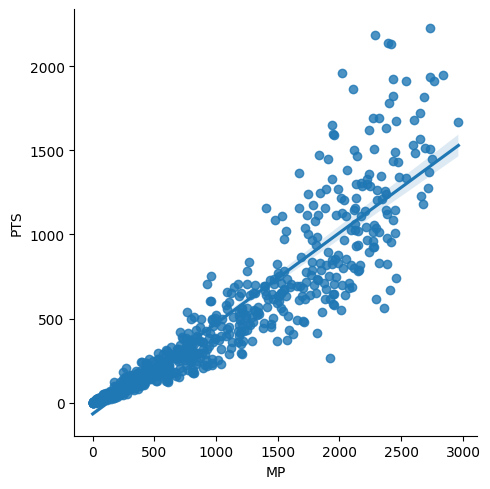

In [ ]:
sns.lmplot(data=nba, x='MP', y = 'PTS')


This scatter plot is meant to represent the relationship between the amount of minutes played per player and how many points they scored. A trendline is put in the graph to show a positive correlation between the amount of minutes played and how many points scored. The trendline shows the strongest relationship between these two variables. 